# Housing Loan Repayment Risk Analysis


In [1]:
!pip install opendatasets

In [2]:
!pip install scikit-learn --upgrade --quiet

In [3]:
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os

In [4]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [5]:
dataset_url = 'https://www.kaggle.com/datasets/urstrulyvikas/house-loan-data-analysis/data'

In [6]:
od.download(dataset_url)

Skipping, found downloaded files in "./house-loan-data-analysis" (use force=True to force download)


### Exploratory Data Analysis

In [7]:
path = os.getcwd()

In [8]:
file = path +'/house-loan-data-analysis/loan_data.csv'
df = pd.read_csv(file)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [10]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [11]:
data_columns = df.columns[:20]

In [12]:
df = df[data_columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

In [14]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION'],
      dtype='object')

In [15]:
df.isna().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
NAME_TYPE_SUITE               1292
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
dtype: int64

In [16]:
df['NAME_TYPE_SUITE'].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [17]:
pd.DataFrame(df['NAME_TYPE_SUITE']).value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

Handling missing values

In [18]:
df['NAME_TYPE_SUITE'].fillna(value='unknown',inplace=True)

<ipython-input-18-bc7b838567f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NAME_TYPE_SUITE'].fillna(value='unknown',inplace=True)


In [19]:
pd.DataFrame(df['NAME_TYPE_SUITE']).value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
unknown              1292
Other_A               866
Group of people       271
Name: count, dtype: int64

In [20]:
df.dropna(subset=['AMT_ANNUITY','AMT_GOODS_PRICE'],inplace=True)

<ipython-input-20-71550bd73e28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['AMT_ANNUITY','AMT_GOODS_PRICE'],inplace=True)


In [21]:
df.isna().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
dtype: int64

In [22]:
df.shape

(307221, 20)

Create Input matrix and Target vector

In [23]:
input_df = df[data_columns].copy()
input_df = input_df.drop(labels=['TARGET','SK_ID_CURR'],axis=1)
input_df

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0
1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0
3,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0
4,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0
307507,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0
307508,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0
307509,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0


In [24]:
numerical_col = []
for col in input_df.columns:
  if(input_df[col].dtype == 'float64' or input_df[col].dtype == 'int64'):
    numerical_col.append(col)

numerical_col = np.array(numerical_col)
numerical_col

array(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION'], dtype='<U26')

In [25]:
input_df[numerical_col].info()

<class 'pandas.core.frame.DataFrame'>
Index: 307221 entries, 0 to 307510
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CNT_CHILDREN                307221 non-null  int64  
 1   AMT_INCOME_TOTAL            307221 non-null  float64
 2   AMT_CREDIT                  307221 non-null  float64
 3   AMT_ANNUITY                 307221 non-null  float64
 4   AMT_GOODS_PRICE             307221 non-null  float64
 5   REGION_POPULATION_RELATIVE  307221 non-null  float64
 6   DAYS_BIRTH                  307221 non-null  int64  
 7   DAYS_EMPLOYED               307221 non-null  int64  
 8   DAYS_REGISTRATION           307221 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 23.4 MB


In [26]:
input_df[numerical_col].describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION
count,307221.000000,3.072210e+05,3.072210e+05,307221.000000,3.072210e+05,307221.000000,307221.000000,307221.000000,307221.000000
mean,0.416977,1.688326e+05,5.993163e+05,27120.452357,5.383973e+05,0.020870,-16038.787130,63851.095221,-4986.328060
std,0.722047,2.372199e+05,4.025196e+05,14492.106811,3.694484e+05,0.013832,4363.852714,141305.918999,3523.139489
min,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000
25%,0.000000,1.125000e+05,2.700000e+05,16551.000000,2.385000e+05,0.010006,-19684.000000,-2760.000000,-7480.000000
50%,0.000000,1.485000e+05,5.146020e+05,24916.500000,4.500000e+05,0.018850,-15753.000000,-1213.000000,-4504.000000
75%,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12415.000000,-289.000000,-2010.000000
max,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000


In [27]:
categorical_col = np.array([col for col in input_df.columns if col not in numerical_col])
categorical_col

array(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE'],
      dtype='<U19')

In [28]:
input_df[categorical_col].info()

<class 'pandas.core.frame.DataFrame'>
Index: 307221 entries, 0 to 307510
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   NAME_CONTRACT_TYPE   307221 non-null  object
 1   CODE_GENDER          307221 non-null  object
 2   FLAG_OWN_CAR         307221 non-null  object
 3   FLAG_OWN_REALTY      307221 non-null  object
 4   NAME_TYPE_SUITE      307221 non-null  object
 5   NAME_INCOME_TYPE     307221 non-null  object
 6   NAME_EDUCATION_TYPE  307221 non-null  object
 7   NAME_FAMILY_STATUS   307221 non-null  object
 8   NAME_HOUSING_TYPE    307221 non-null  object
dtypes: object(9)
memory usage: 23.4+ MB


In [29]:
input_df[categorical_col].describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
count,307221,307221,307221,307221,307221,307221,307221,307221,307221
unique,2,3,2,2,8,8,5,5,6
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment
freq,278220,202251,202637,213086,248515,158583,218186,196258,272624


OneHotEncoding

In [30]:
encoded_cols = pd.get_dummies(input_df[categorical_col]).astype(int)
encoded_cols

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,1,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
1,1,0,1,0,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,1,0,1,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1,0,0,1,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
307507,1,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
307508,1,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
307509,1,0,1,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


In [31]:
input_df = pd.concat([input_df.drop(columns=categorical_col), encoded_cols], axis=1)

In [32]:
input_df.shape

(307221, 50)

In [35]:
y = df['TARGET']

In [36]:
pd.DataFrame(y).value_counts()

TARGET
0         282417
1          24804
Name: count, dtype: int64

The dataset is highly imbalance

Retrying with different approach

In [37]:
shuffled_data= df.sample(frac=1,random_state=42).copy()
unpaid_home_loan=shuffled_data.loc[shuffled_data['TARGET']==1]
paid_home_loan=shuffled_data.loc[shuffled_data['TARGET']==0].sample(n=int(3*(24804)),random_state=69)
normalised_home_loan=pd.concat([unpaid_home_loan,paid_home_loan,unpaid_home_loan,unpaid_home_loan])

<Axes: ylabel='count'>

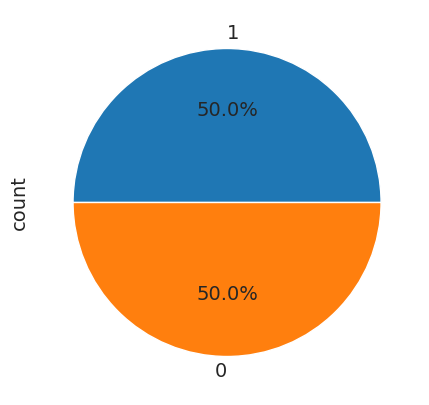

In [38]:
normalised_home_loan.TARGET.value_counts().plot(kind='pie',autopct="%1.1f%%")

In [39]:
input_df = normalised_home_loan.drop(['TARGET','SK_ID_CURR'],axis=1).copy()
y = normalised_home_loan['TARGET']

In [40]:
encoded_cols = pd.get_dummies(input_df[categorical_col]).astype(int)
encoded_cols

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
18642,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
277586,0,1,1,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
9496,1,0,0,1,0,0,1,1,0,0,...,1,0,0,0,0,0,1,0,0,0
251938,1,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
287442,1,0,0,1,0,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281866,1,0,1,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
2748,1,0,0,1,0,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
199211,0,1,1,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
64878,0,1,0,1,0,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0


In [41]:
input_df = pd.concat([input_df.drop(columns=categorical_col), encoded_cols], axis=1)

In [42]:
input_df.shape

(148824, 50)

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(input_df)

In [45]:
input_df = pd.DataFrame(scaled_data,columns=input_df.columns)
input_df

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,NAME_CONTRACT_TYPE_Cash loans,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,0.000000,0.000260,0.048315,0.046308,0.048315,0.196267,0.677510,0.045620,0.700268,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.105263,0.000473,0.044944,0.041566,0.044944,0.206749,0.624037,0.044735,0.983990,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.105263,0.000935,0.148584,0.131295,0.101124,0.282797,0.593905,0.041851,0.923233,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.000000,0.000358,0.057747,0.042151,0.048315,0.344429,0.181989,1.000000,0.635944,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.000000,0.000935,0.078652,0.052563,0.078652,0.197042,0.433088,0.036817,0.683690,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148819,0.000000,0.001127,0.117978,0.160553,0.117978,0.392880,0.550020,0.045482,0.846304,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
148820,0.052632,0.000742,0.100638,0.067433,0.067416,0.097483,0.785881,0.038771,0.782425,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
148821,0.000000,0.000935,0.056180,0.051655,0.056180,0.083165,0.535582,0.039591,0.785587,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
148822,0.052632,0.000935,0.073034,0.066788,0.073034,0.276330,0.789191,0.042018,0.971668,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(input_df, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
model = RandomForestClassifier()

# Train the model with resampled data
model.fit(X_train,y_train)

# Make predictions
y_pred = model.predict(X_test)

In [50]:
y_pred = model.predict(X_train)

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [52]:
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [53]:
y_pred = model.predict(X_test)

In [54]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9248446161599194


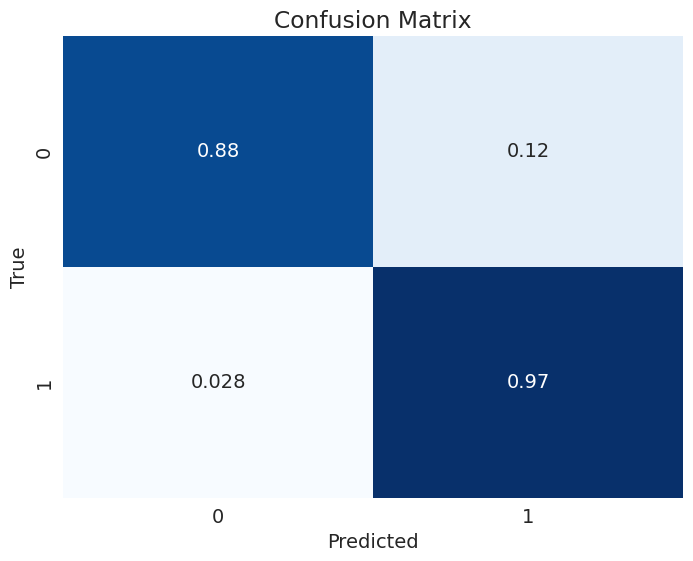

In [55]:
cm = confusion_matrix(y_test, y_pred,normalize='true')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [56]:
params = model.get_params()

# Print the model parameters
print("Model Parameters:")
for param, value in params.items():
    print(f"{param}: {value}")

Model Parameters:
bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
n_estimators: 100
n_jobs: None
oob_score: False
random_state: None
verbose: 0
warm_start: False


In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92     14835
           1       0.89      0.97      0.93     14930

    accuracy                           0.92     29765
   macro avg       0.93      0.92      0.92     29765
weighted avg       0.93      0.92      0.92     29765



In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
# Initialize logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
y_pred = model.predict(X_train)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [61]:
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.613561343535558


In [62]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [63]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6127666722660843


In [64]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6127666722660843


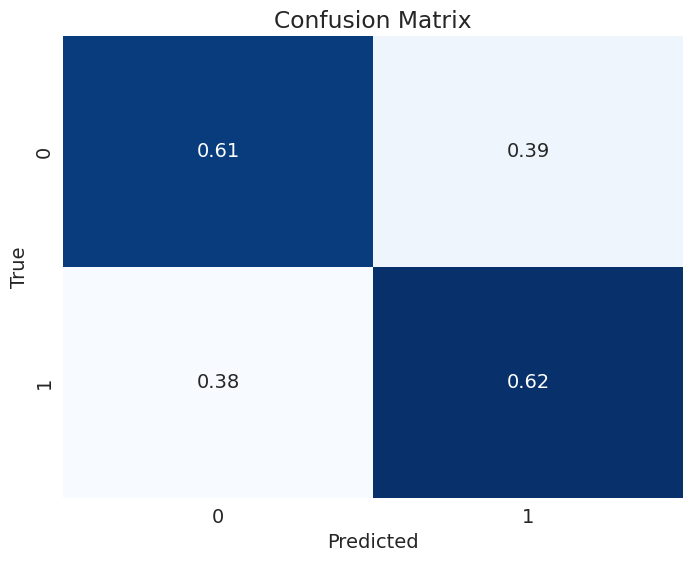

In [65]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred,normalize='true')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [88]:
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [69]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 0, 1])

In [70]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8507643205106669


In [71]:
model.tree_.max_depth

41

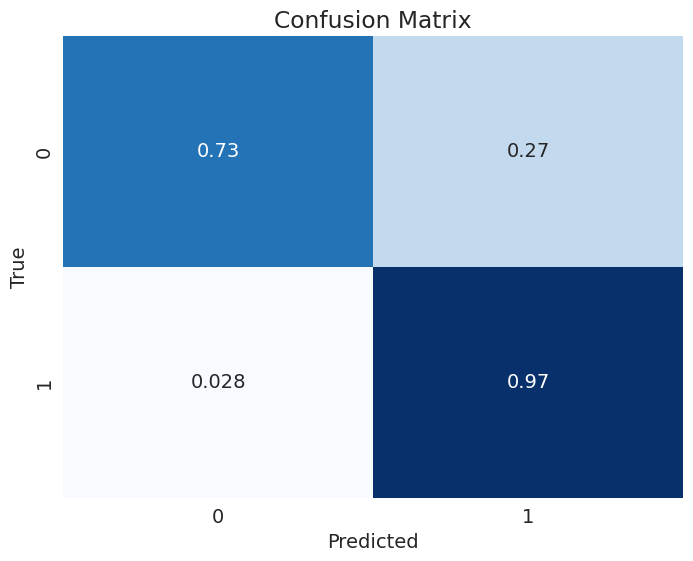

In [72]:
cm = confusion_matrix(y_test, y_pred,normalize='true')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.73      0.83     14835
           1       0.78      0.97      0.87     14930

    accuracy                           0.85     29765
   macro avg       0.87      0.85      0.85     29765
weighted avg       0.87      0.85      0.85     29765



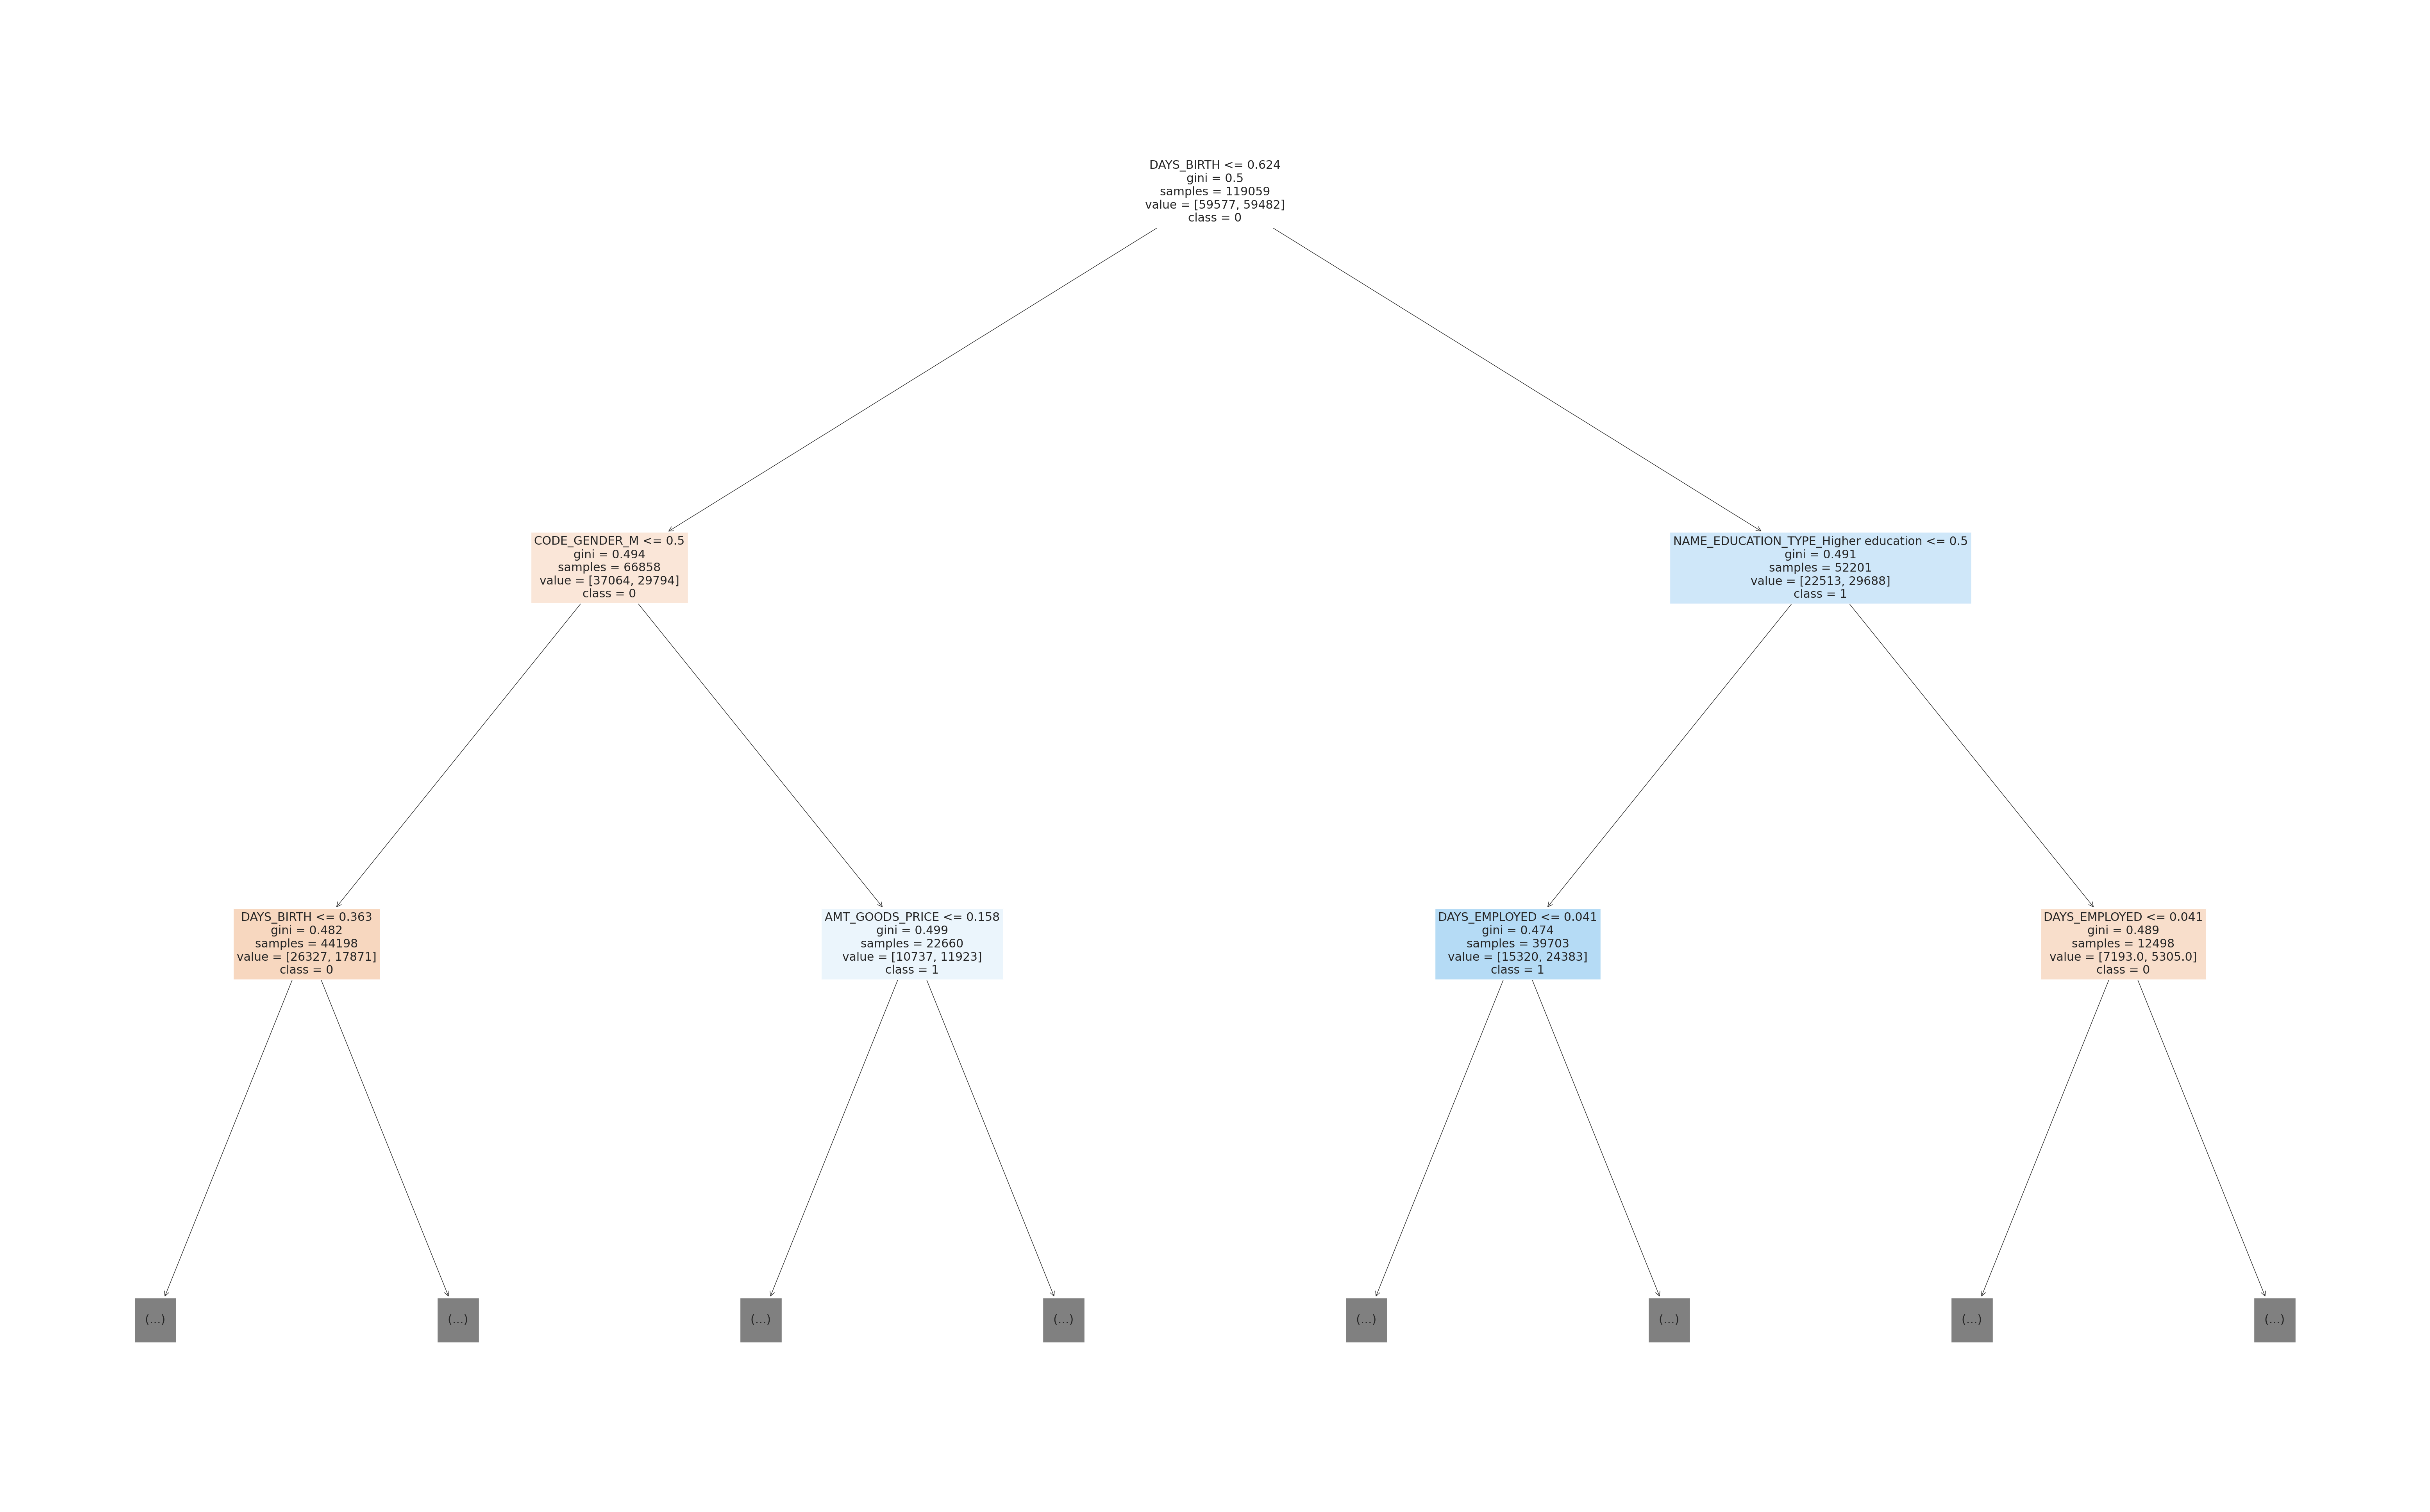

In [74]:
plt.figure(figsize=(80,50))
plot_tree(model, max_depth = 2,filled=True, feature_names=X_train.columns, class_names=['0', '1'])
plt.show()

In [75]:
from sklearn.tree import export_text

In [76]:
tree_text = export_text(model, max_depth=5, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- DAYS_BIRTH <= 0.62
|   |--- CODE_GENDER_M <= 0.50
|   |   |--- DAYS_BIRTH <= 0.36
|   |   |   |--- AMT_CREDIT <= 0.05
|   |   |   |   |--- DAYS_BIRTH <= 0.10
|   |   |   |   |   |--- AMT_INCOME_TOTAL <= 0.00
|   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |--- AMT_INCOME_TOTAL >  0.00
|   |   |   |   |   |   |--- truncated branch of depth 24
|   |   |   |   |--- DAYS_BIRTH >  0.10
|   |   |   |   |   |--- DAYS_EMPLOYED <= 0.04
|   |   |   |   |   |   |--- truncated branch of depth 14
|   |   |   |   |   |--- DAYS_EMPLOYED >  0.04
|   |   |   |   |   |   |--- truncated branch of depth 36
|   |   |   |--- AMT_CREDIT >  0.05
|   |   |   |   |--- DAYS_EMPLOYED <= 0.04
|   |   |   |   |   |--- DAYS_EMPLOYED <= 0.01
|   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |--- DAYS_EMPLOYED >  0.01
|   |   |   |   |   |   |--- truncated branch of depth 27
|   |   |   |   |--- DAYS_EMPLOYED >  0.04
|   |   |   |   |   |--- AMT_ANNUITY <= 0

In [77]:
!pip install graphviz

In [78]:
import graphviz
from sklearn import tree


In [104]:
dot_data = tree.export_graphviz(model, max_depth= 3, out_file=None,feature_names=X_train.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render("House Loan")

'House Loan.pdf'

In [80]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [91]:
importance_df.sort_values(by=['importance'],ascending=False,inplace=True)
importance_df.reset_index(inplace=True,drop=True)
importance_df

,feature,importance
0,DAYS_BIRTH,0.140758
1,DAYS_REGISTRATION,0.122857
2,AMT_ANNUITY,0.112743
3,DAYS_EMPLOYED,0.106761
4,REGION_POPULATION_RELATIVE,0.096687
5,AMT_CREDIT,0.084043
6,AMT_INCOME_TOTAL,0.081889
7,AMT_GOODS_PRICE,0.063276
8,CNT_CHILDREN,0.018200
9,NAME_EDUCATION_TYPE_Higher education,0.015572


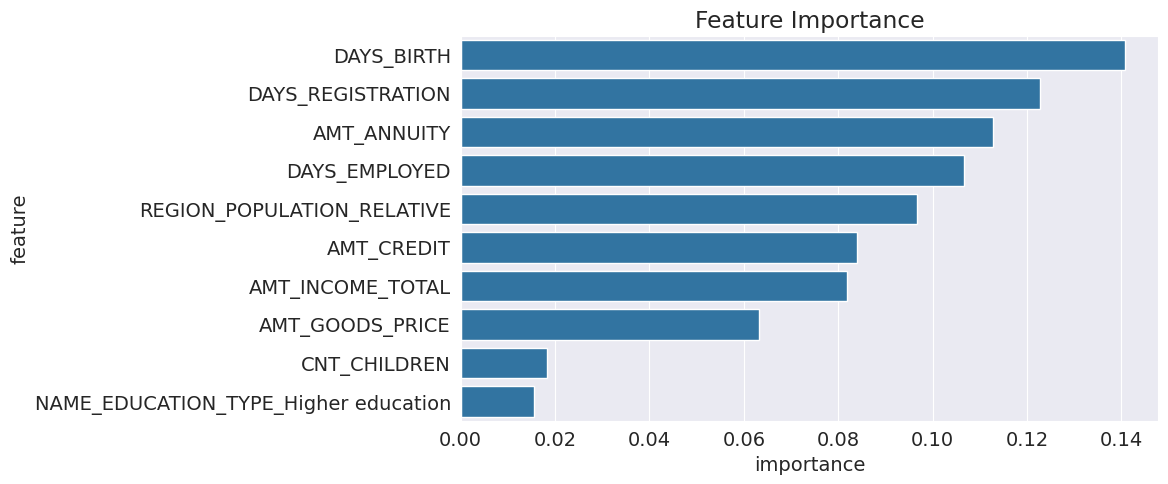

In [98]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [100]:
correlation_matrix = input_df[importance_df.feature.head(10)].corr()
correlation_matrix

,DAYS_BIRTH,DAYS_REGISTRATION,AMT_ANNUITY,DAYS_EMPLOYED,REGION_POPULATION_RELATIVE,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,CNT_CHILDREN,NAME_EDUCATION_TYPE_Higher education
DAYS_BIRTH,1.000000,0.317963,-0.005240,-0.602396,-0.042484,-0.093973,0.007884,-0.095045,0.299591,0.071961
DAYS_REGISTRATION,0.317963,1.000000,0.036570,-0.209593,-0.054558,-0.006795,0.007004,-0.007043,0.169161,0.067394
AMT_ANNUITY,-0.005240,0.036570,1.000000,-0.092765,0.101388,0.763250,0.077157,0.766274,0.023404,0.134050
DAYS_EMPLOYED,-0.602396,-0.209593,-0.092765,1.000000,0.005497,-0.037221,-0.025247,-0.032501,-0.220899,-0.076643
REGION_POPULATION_RELATIVE,-0.042484,-0.054558,0.101388,0.005497,1.000000,0.090350,0.024642,0.096530,-0.027465,0.066643
AMT_CREDIT,-0.093973,-0.006795,0.763250,-0.037221,0.090350,1.000000,0.062818,0.985352,-0.003611,0.125311
AMT_INCOME_TOTAL,0.007884,0.007004,0.077157,-0.025247,0.024642,0.062818,1.000000,0.063329,0.006310,0.035509
AMT_GOODS_PRICE,-0.095045,-0.007043,0.766274,-0.032501,0.096530,0.985352,0.063329,1.000000,-0.009315,0.139044
CNT_CHILDREN,0.299591,0.169161,0.023404,-0.220899,-0.027465,-0.003611,0.006310,-0.009315,1.000000,0.012002
NAME_EDUCATION_TYPE_Higher education,0.071961,0.067394,0.134050,-0.076643,0.066643,0.125311,0.035509,0.139044,0.012002,1.000000


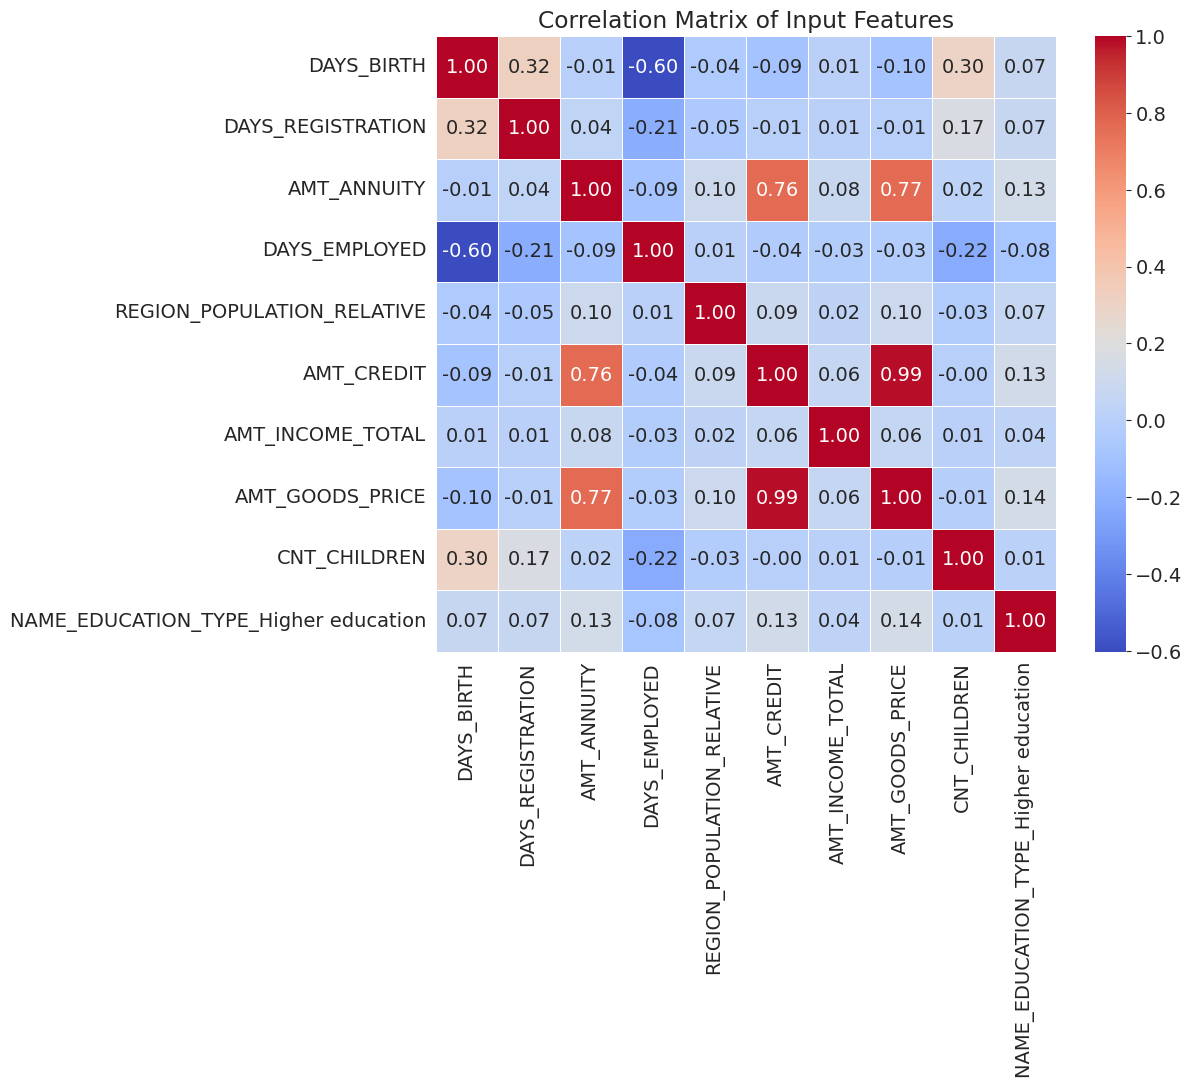

In [101]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Input Features')
plt.show()

Hyperparameter Tuning

In [126]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, y_train)
    train_acc = 1 - model.score(X_train,y_train)
    test_acc = 1 - model.score(X_test,y_test)
    return {'Max Depth': md, 'Train Error': train_acc, 'Test Error': test_acc}

In [127]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 47)])

CPU times: user 1min 43s, sys: 117 ms, total: 1min 43s
Wall time: 1min 43s


In [128]:
errors_df

,Max Depth,Train Error,Test Error
0,1,0.439337,0.438468
1,2,0.413518,0.412330
2,3,0.406168,0.406215
3,4,0.401540,0.404771
4,5,0.396375,0.400706
5,6,0.388186,0.392777
6,7,0.383617,0.389115
7,8,0.374730,0.386561
8,9,0.362778,0.380783
9,10,0.351574,0.376852


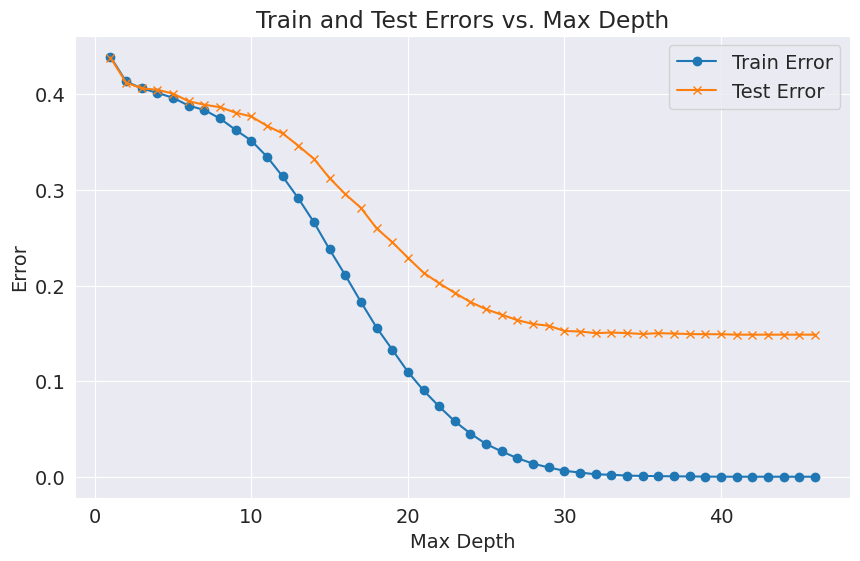

In [133]:
plt.figure(figsize=(10, 6))
plt.plot(errors_df['Max Depth'], errors_df['Train Error'], marker='o', label='Train Error')
plt.plot(errors_df['Max Depth'], errors_df['Test Error'], marker='x', label='Test Error')
plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.title('Train and Test Errors vs. Max Depth')
plt.legend()
plt.grid(True)
plt.show()

KFold

In [ ]:
from sklearn.model_selection import KFold

In [83]:
kf = KFold(n_splits=5, random_state = 42, shuffle=True)
kf

KFold(n_splits=5, random_state=42, shuffle=True)

In [84]:
KFold(n_splits=5, random_state=42, shuffle=True)

KFold(n_splits=5, random_state=42, shuffle=True)

In [85]:
LogisticRegressionModels = []

for train_indx, test_indx in kf.split(input_df):
    #print(train_indx.shape,val_indx.shape)
    model = LogisticRegression(solver='liblinear')
    model.fit(input_df.iloc[train_indx],y.iloc[train_indx])
    train_preds = model.predict(input_df.iloc[train_indx])
    print("Training accuracy score: ",accuracy_score(y.iloc[train_indx],train_preds))
    test_preds = model.predict(input_df.iloc[test_indx])
    print("Test accuracy score: ",accuracy_score(y.iloc[test_indx],test_preds))
    LogisticRegressionModels.append(model)
    print()
print('KFold Validation complete')

Training accuracy score:  0.6143172712688667
Test accuracy score:  0.6142449185284731

Training accuracy score:  0.6153923684895724
Test accuracy score:  0.6116915840752561

Training accuracy score:  0.6137545250674036
Test accuracy score:  0.6168318494876532

Training accuracy score:  0.6139225090081388
Test accuracy score:  0.6142113220225096

Training accuracy score:  0.6144464975642533
Test accuracy score:  0.6134256148367155

KFold Validation complete


In [135]:
model = LogisticRegressionModels[4]

In [136]:
# Access coefficients (weights)
coefficients = model.coef_

# Access intercept (bias)
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[-4.49155634e-01  3.18151669e-01  7.64330934e+00  1.35328776e+00
  -9.84153752e+00 -5.74931549e-01  1.02487921e+00  8.70377243e+00
   5.49348030e-01 -2.90634816e-01 -7.22229536e-01 -4.74005771e-01
  -9.18469983e-02 -4.47011583e-01 -3.57535184e-01 -6.55329168e-01
  -5.31649210e-01 -4.81215142e-01 -4.08861650e-02 -1.19255022e-01
   1.78473062e-01 -1.99465280e-01 -1.31805223e-02 -1.70522792e-01
  -7.12117197e-02 -5.76815914e-01 -1.57513687e-01  1.77377458e+00
   2.52901062e+00 -6.56967905e+00  1.58624341e+00 -3.62425633e-01
  -1.75158102e+00  1.93930641e+00 -1.13055567e+00 -3.33529800e-01
  -9.43314344e-02  3.73260754e-01  1.72291801e-01 -1.34881404e-01
  -3.01640487e-01 -1.75677725e-01 -1.90608105e-01 -2.10056631e-01
  -1.51572743e-01 -1.92530535e-01 -1.09143634e-01 -4.58090935e-01
  -6.83470010e-03 -9.46918050e-02]]
Intercept: [-1.01286435]


In [146]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[0.68037211, 0.31962789],
       [0.46863604, 0.53136396],
       [0.37779745, 0.62220255],
       ...,
       [0.31204363, 0.68795637],
       [0.69388363, 0.30611637],
       [0.49407232, 0.50592768]])

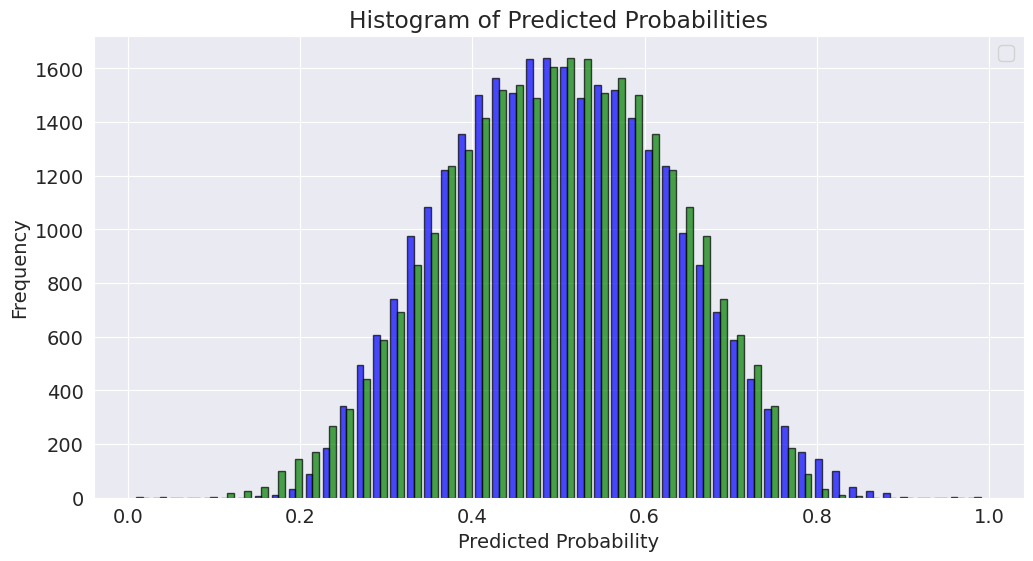

In [147]:
# Histogram of Predicted Probabilities
plt.figure(figsize=(12, 6))
plt.hist(y_pred_proba, bins=50, color=['blue','green'], edgecolor='black', alpha=0.7)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.legend()
plt.grid(True)
plt.show()

In [150]:
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, average_precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.calibration import calibration_curve

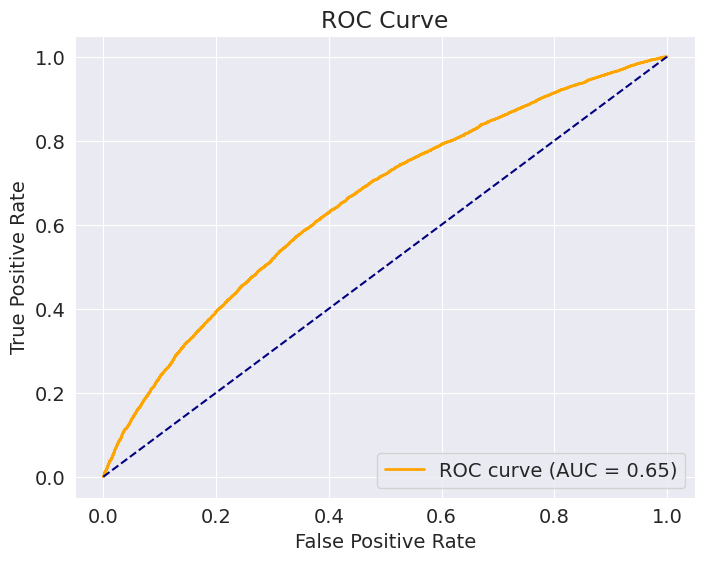

In [154]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_score(y_test, y_pred_proba[:,1]))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

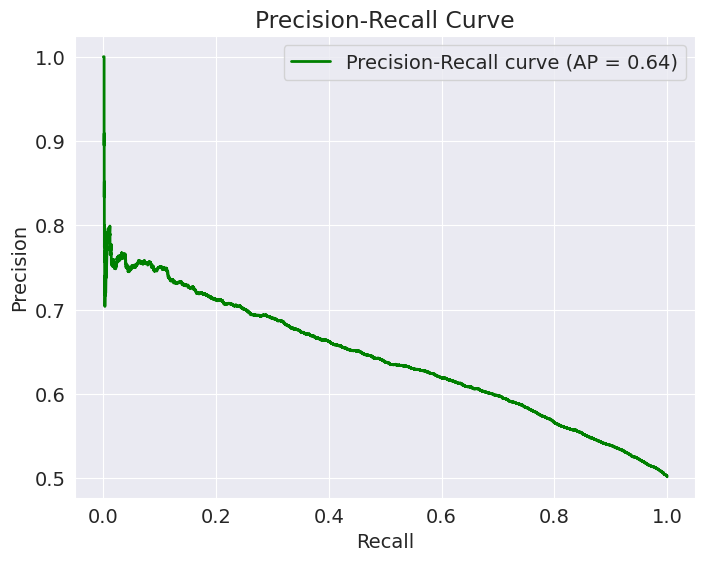

In [155]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision_score(y_test, y_pred_proba[:,1]))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

In [173]:
# Coefficients Plot
coefficients = model.coef_[0].reshape(50)
feature_names = X_train.columns
coeff_df = pd.DataFrame(data={'feature_name':feature_names,'coefficients':coefficients})


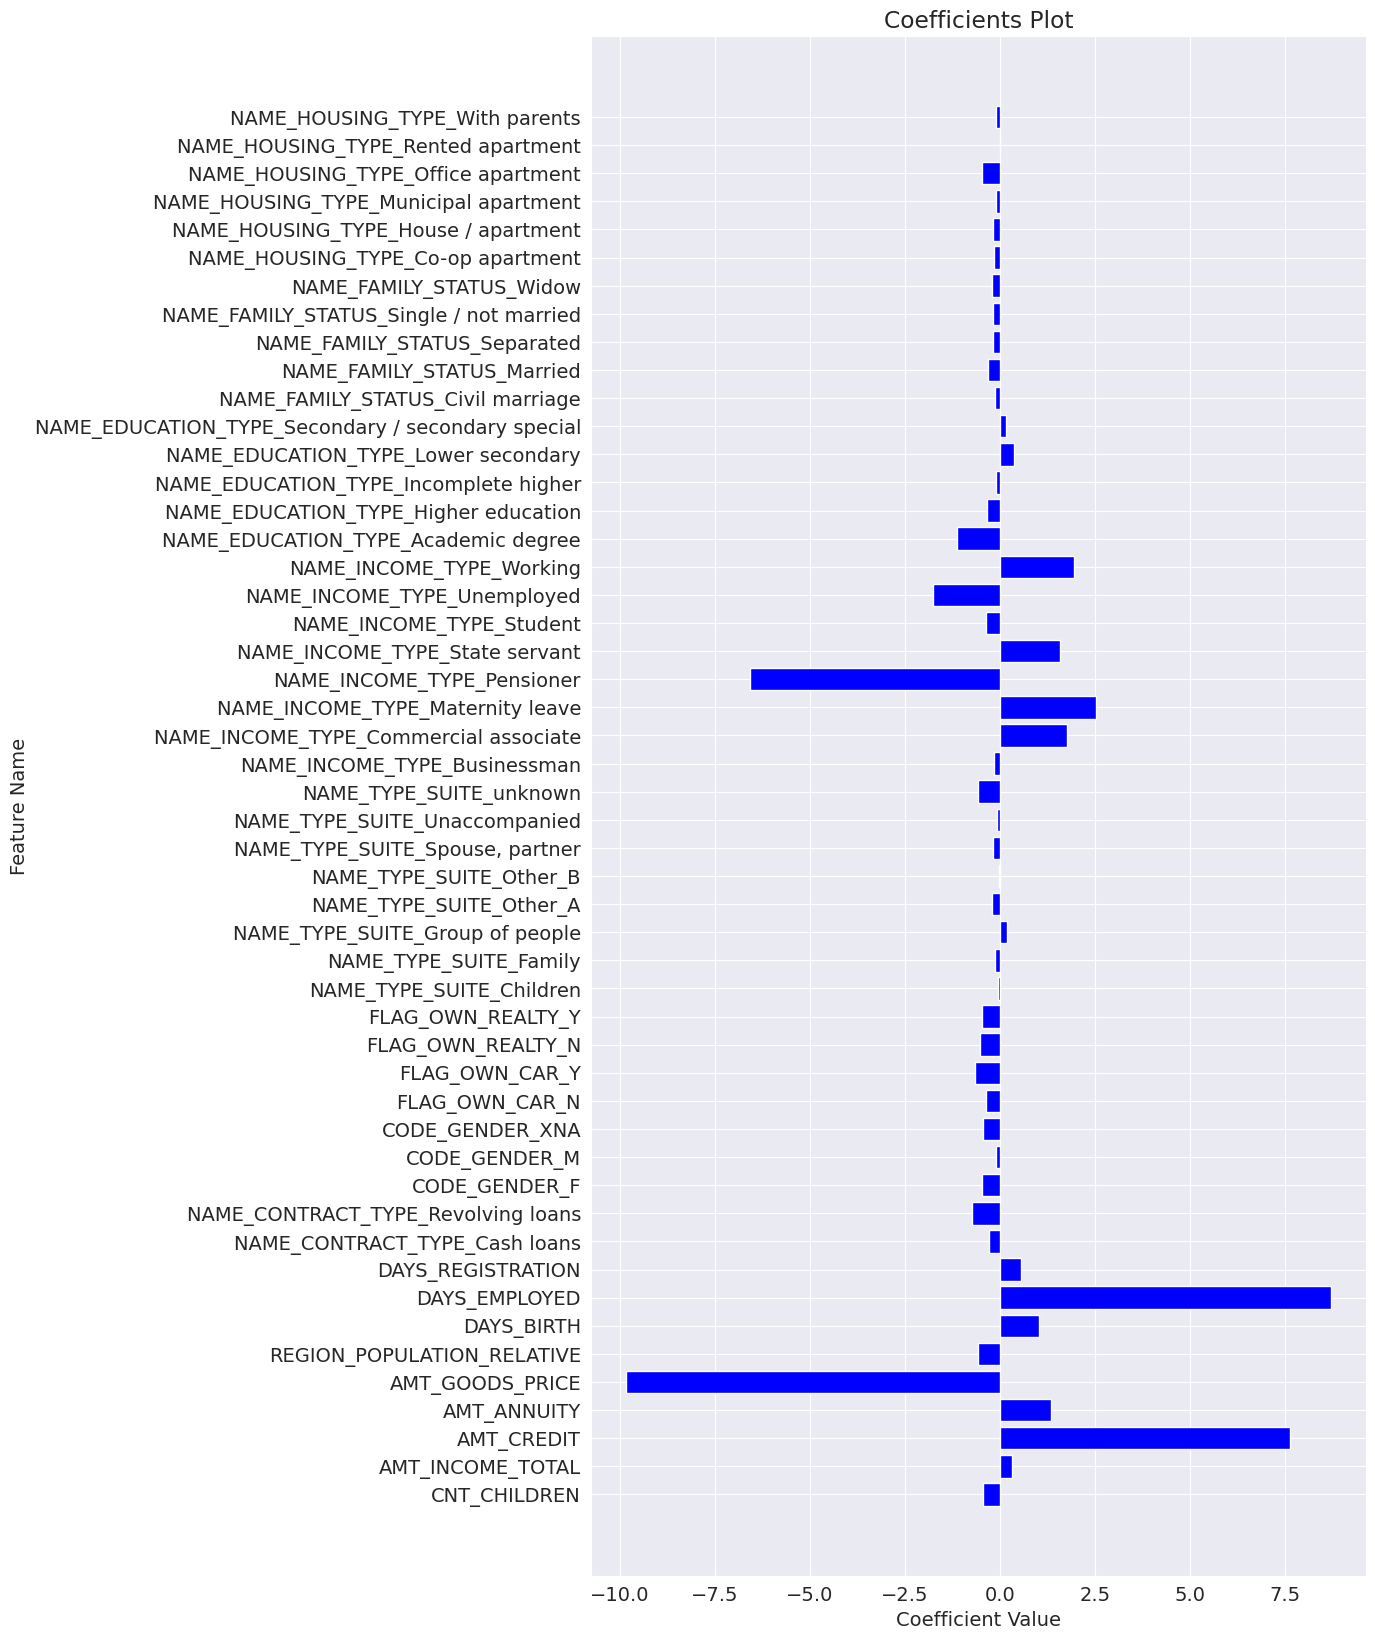

In [176]:
plt.figure(figsize=(10, 20))
plt.barh(feature_names, coefficients, color='blue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.title('Coefficients Plot')
plt.show()

<Figure size 800x600 with 0 Axes>

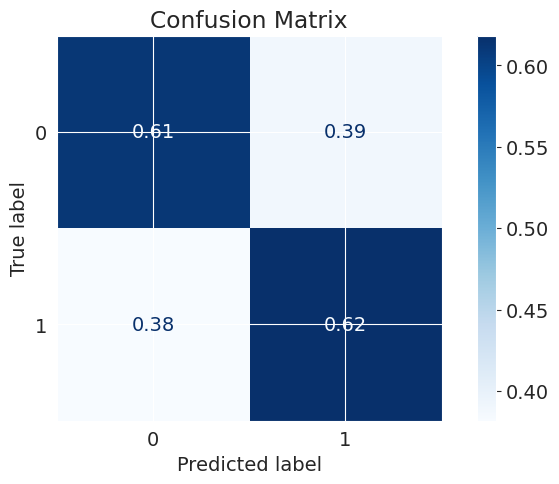

In [179]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [86]:
RandomForestModels = []

for train_indx, test_indx in kf.split(input_df):
    #print(train_indx.shape,val_indx.shape)
    model = RandomForestClassifier()
    model.fit(input_df.iloc[train_indx],y.iloc[train_indx])
    train_preds = model.predict(input_df.iloc[train_indx])
    print("Training accuracy score: ",accuracy_score(y.iloc[train_indx],train_preds))
    test_preds = model.predict(input_df.iloc[test_indx])
    print("Test accuracy score: ",accuracy_score(y.iloc[test_indx],test_preds))
    RandomForestModels.append(model)
    print()
print('KFold Validation complete')

Training accuracy score:  1.0
Test accuracy score:  0.9244414580883588

Training accuracy score:  1.0
Test accuracy score:  0.9229296153200067

Training accuracy score:  1.0
Test accuracy score:  0.9212161935158744

Training accuracy score:  1.0
Test accuracy score:  0.919771543759449

Training accuracy score:  1.0
Test accuracy score:  0.92084397258433

KFold Validation complete


In [180]:
model = RandomForestModels[0]

In [184]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [185]:
importance_df.sort_values(by=['importance'],ascending=False,inplace=True)
importance_df.reset_index(inplace=True,drop=True)
importance_df

,feature,importance
0,DAYS_BIRTH,1.189404e-01
1,DAYS_REGISTRATION,1.088929e-01
2,AMT_ANNUITY,1.030959e-01
3,DAYS_EMPLOYED,1.004085e-01
4,AMT_CREDIT,9.333470e-02
5,REGION_POPULATION_RELATIVE,9.215900e-02
6,AMT_INCOME_TOTAL,8.119946e-02
7,AMT_GOODS_PRICE,7.915206e-02
8,CNT_CHILDREN,2.267934e-02
9,NAME_FAMILY_STATUS_Married,1.236518e-02


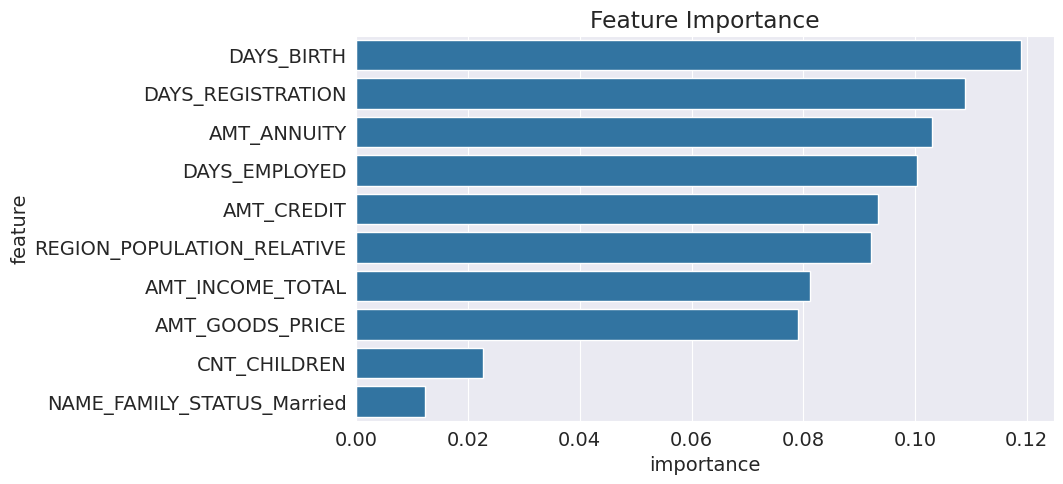

In [186]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

<Figure size 800x600 with 0 Axes>

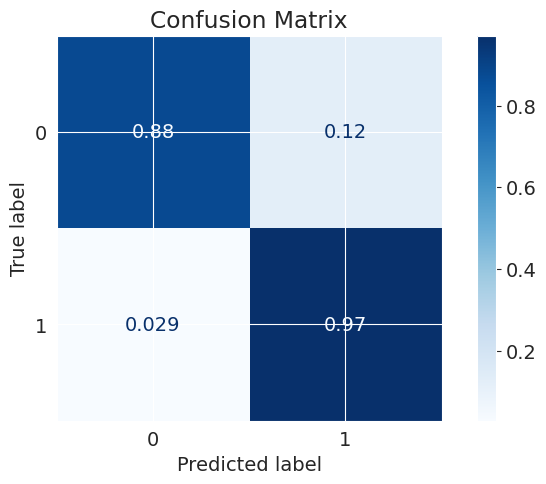

In [187]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

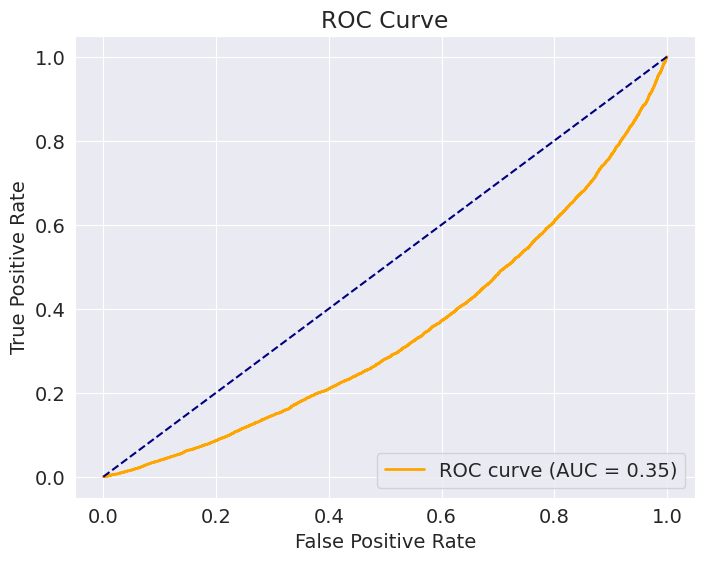

In [190]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,0])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_score(y_test, y_pred_proba[:,0]))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

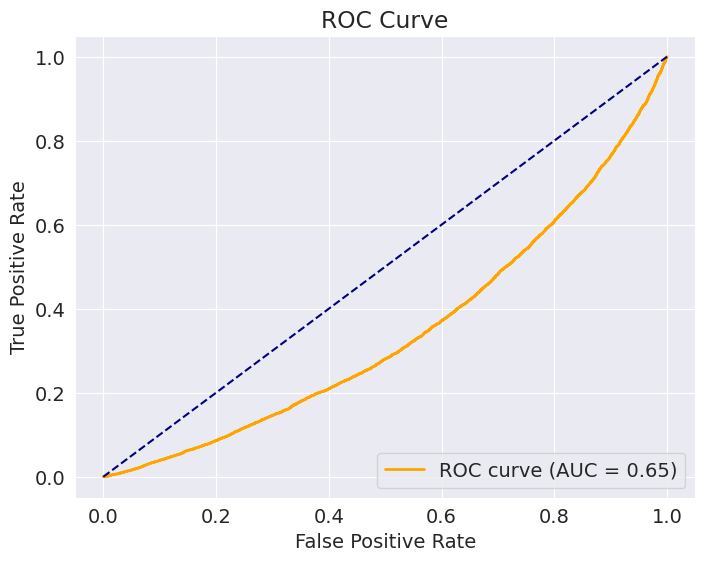

In [191]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,0])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_score(y_test, y_pred_proba[:,1]))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

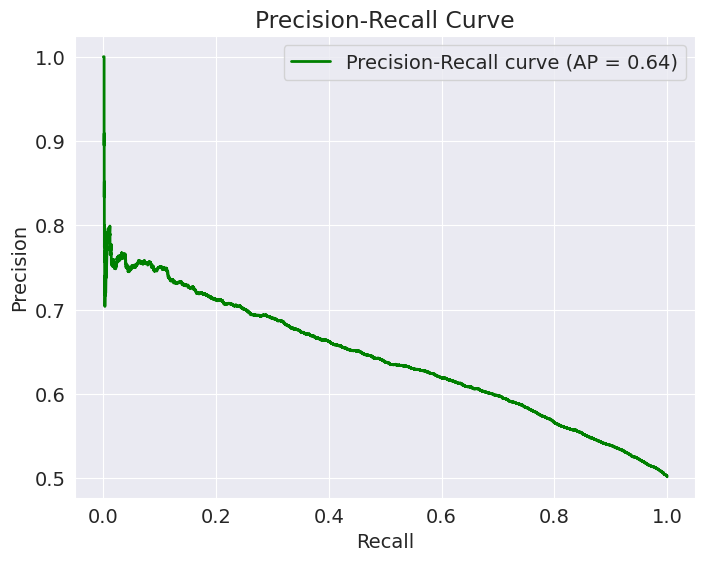

In [193]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision_score(y_test, y_pred_proba[:,1]))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

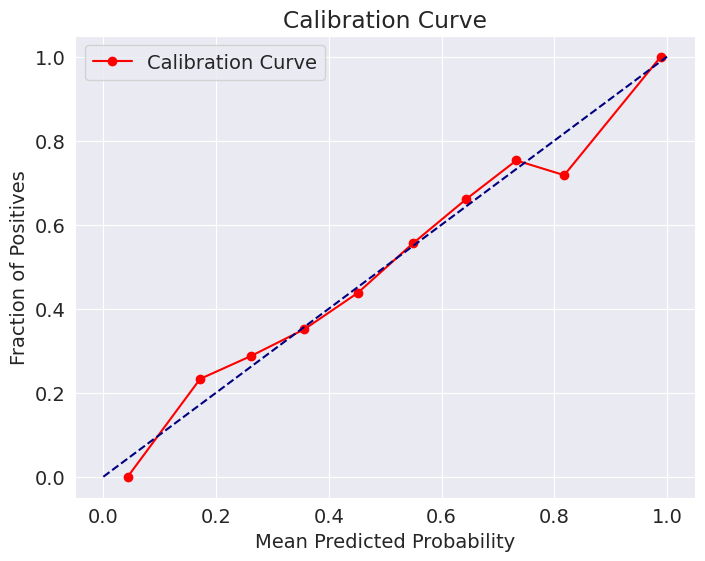

In [195]:
plt.figure(figsize=(8, 6))
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba[:,1], n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', color='red', label='Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend(loc="upper left")
plt.show()

In [87]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# # Define the parameter distributions
# param_dist = {
#     'n_estimators': randint(50, 200),
#     'max_depth': randint(5, 20),
#     'min_samples_split': randint(2, 20),
#     'min_samples_leaf': randint(1, 10),
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# # Initialize Random Forest classifier
# rf = RandomForestClassifier(random_state=42)

# # Perform random search
# random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)
# random_search.fit(X_train, y_train)

# # Get the best parameters and best score
# best_params = random_search.best_params_
# best_score = random_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Score:", best_score)